# **TMDB EDA**

- Yvon Bilodeau
- May 2022

- How many movies had at least some valid financial information (values > 0 for budget OR revenue)?
Excluding any movies with 0's for budget AND revenue from the remaining visualizations.
- How many movies are there in each of the certification categories (G/PG/PG-13/R)?
- What is the average revenue per certification category?
- What is the average budget per certification category?

## **Imports**

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import StrMethodFormatter
price_fmt = StrMethodFormatter("${x:,.0f}")
sns.set_style('white')

## **Data**

In [2]:
# Load in the csv.gz's of results for years 2000 and 2001
year_2000_df = pd.read_csv("Data/final_tmdb_data_2000.csv.gz")
year_2001_df = pd.read_csv("Data/final_tmdb_data_2001.csv.gz")

In [3]:
# Combine years 2000 and 2001 into a single dataframe
tmdb_results_combined_df = year_2000_df.append(year_2001_df)

In [4]:
# Display the tail and head of the combines dataframe
tmdb_results_combined_df

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0113026,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,The Fantasticks,...,0.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.4,21.0,NaN
2,tt0113092,0.0,NaN,NaN,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,110977.0,en,For the Cause,...,0.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The ultimate showdown on a forbidden planet.,For the Cause,0.0,4.4,7.0,NaN
3,tt0116391,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,442869.0,hi,Gang,...,0.0,152.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,NaN,Gang,0.0,0.0,0.0,NaN
4,tt0118694,0.0,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,NaN,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",http://www.wkw-inthemoodforlove.com/,843.0,cn,花樣年華,...,12854953.0,99.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,0.0,8.1,1859.0,PG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1272,tt7797670,0.0,NaN,NaN,0.0,"[{'id': 27, 'name': 'Horror'}]",NaN,956214.0,en,Edmund Kemper Part 2: La Mort C'est La Vie,...,0.0,91.0,[],Released,NaN,Edmund Kemper Part 2: La Mort C'est La Vie,0.0,0.0,0.0,NaN
1273,tt7797790,0.0,NaN,NaN,0.0,"[{'id': 27, 'name': 'Horror'}]",NaN,956219.0,en,Edmund Kemper Part 3: La mort sévit,...,0.0,72.0,"[{'english_name': 'French', 'iso_639_1': 'fr',...",Released,NaN,Edmund Kemper Part 3: La mort sévit,0.0,0.0,0.0,NaN
1274,tt8665056,0.0,NaN,NaN,0.0,"[{'id': 37, 'name': 'Western'}]",http://skeletoncreekproductions.com/p-movie-br...,885436.0,en,Guns Along The Bravo,...,0.0,85.0,[],Released,Evil came to the Southwest until three blazing...,Guns Along The Bravo,0.0,0.0,0.0,NaN
1275,tt8795764,0.0,NaN,NaN,0.0,"[{'id': 27, 'name': 'Horror'}]",https://www.utahwolf.com/films/coming-soon-new...,871624.0,en,New Breed,...,0.0,57.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,New Breed,0.0,0.0,0.0,NR


In [5]:
# Save a final merged .csv.gz of all of the tmdb api data 
tmdb_results_combined_df.to_csv("Data/tmdb_results_combined.csv.gz", 
                                compression="gzip", 
                                index=False)

### **How many movies had at least some valid financial information (values > 0 for budget OR revenue)?**

In [6]:
# Financial information filter
fin_filter = (tmdb_results_combined_df['budget'] > 0) | (tmdb_results_combined_df['revenue'] > 0)
# Create a dataframe of movies with either a positive budget or revenue
tmdb_results_combined_with_fin_res_df = tmdb_results_combined_df.loc[fin_filter].copy()

In [7]:
# Report the number of movies with either a positive budget or revenue 
fin_movie_count=len(tmdb_results_combined_with_fin_res_df)
print(f'{fin_movie_count} movies had at least some valid financial information.')

615 movies had at least some valid financial information.


### **How many movies are there in each of the certification categories (G/PG/PG-13/R)?**

In [8]:
# Display the value counts for each certification category
tmdb_results_combined_with_fin_res_df['certification'].value_counts()

R        226
PG-13    130
PG        35
NR        17
G         14
Name: certification, dtype: int64

In [9]:
rev_mean_df = tmdb_results_combined_with_fin_res_df.groupby('certification')\
            ['revenue'].agg(['mean']).sort_values('mean', ascending=False).copy()
rev_mean_df['mean'] = round(rev_mean_df['mean'],3)
rev_mean_df

,mean
certification,
G,1.237085e+08
PG,1.111773e+08
PG-13,9.957933e+07
R,3.324591e+07
NR,8.887611e+06


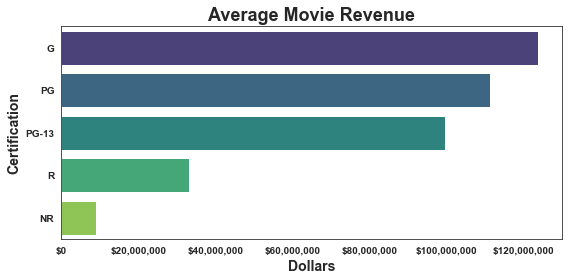

In [10]:
fig, ax = plt.subplots(figsize=(8,4))
sns.barplot(data=rev_mean_df, x='mean', y=rev_mean_df.index, 
            orient='h', 
            palette='viridis'); 
plt.title('Average Movie Revenue', fontsize = 18, weight='bold')
plt.xlabel('Dollars', fontsize = 14, weight='bold')
plt.ylabel('Certification', fontsize = 14, weight='bold');
plt.xticks(fontsize = 10, weight='bold')
plt.yticks(fontsize = 10, weight='bold');
ax.xaxis.set_major_formatter(price_fmt)

plt.tight_layout()
plt.show;

### **What is the average budget per certification category?**

In [11]:
#Grouping the dataframe based on certification and extracting the average budget per certification
bud_mean_df = tmdb_results_combined_with_fin_res_df.groupby('certification')\
            ['budget'].agg(['mean']).sort_values('mean', ascending=False).copy()
bud_mean_df

,mean
certification,
PG,4.497857e+07
PG-13,4.348391e+07
G,4.085714e+07
R,2.028827e+07
NR,6.388241e+06


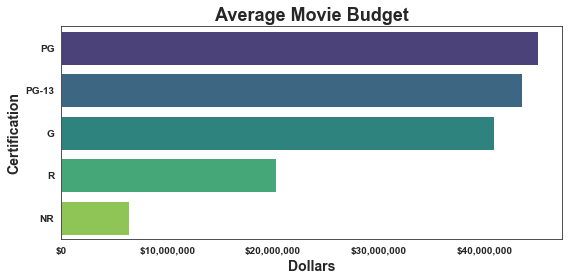

In [12]:
fig, ax = plt.subplots(figsize=(8,4))
sns.barplot(data=bud_mean_df, x='mean', y=bud_mean_df.index, 
            orient='h', 
            palette='viridis'); 
plt.title('Average Movie Budget', fontsize = 18, weight='bold')
plt.xlabel('Dollars', fontsize = 14, weight='bold')
plt.ylabel('Certification', fontsize = 14, weight='bold');
plt.xticks(fontsize = 10, weight='bold')
plt.yticks(fontsize = 10, weight='bold');
ax.xaxis.set_major_formatter(price_fmt)

plt.tight_layout()
plt.show;